# PDF file opening, reading and text extraction

In [78]:
!pip install textract

In [79]:
# Import required libraries
import PyPDF2
import textract
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Open pdf file
pdfFileObj = open('ResumeInsights-main/mycv.pdf','rb')

# Read file
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

# Get total number of pages
num_pages = pdfReader.numPages

# Initialize a count for the number of pages
count = 0

# Initialize a text empty etring variable
text = ""

# Extract text from every page on the file
while count < num_pages:
    pageObj = pdfReader.getPage(count)
    count +=1
    text += pageObj.extractText()

# Text cleaning

In [80]:
# Convert all strings to lowercase
text = text.lower()

# Remove numbers
text = re.sub(r'\d+','',text)

# Remove punctuation
text = text.translate(str.maketrans('','',string.punctuation))

# Dictionary with key terms by area setup*

*Note: the key terms included in each area of this dictionary were obtained through a research of the most common key terms included in industrial and system engineering job postings. This dictionary can be customized to add/remove key terms according to hiring managers criteria.

In [81]:
# Create dictionary key terms by area
terms = {'Quality/Six Sigma':['black belt','capability analysis','control charts','doe','dmaic','fishbone',
                              'gage r&r', 'green belt','ishikawa','iso','kaizen','kpi','lean','metrics',
                              'pdsa','performance improvement','process improvement','quality',
                              'quality circles','quality tools','root cause','six sigma',
                              'stability analysis','statistical analysis','tqm'],      
         
        'Operations management':['automation','bottleneck','constraints','cycle time','efficiency','fmea',
                                 'machinery','maintenance','manufacture','line balancing','oee','operations',
                                 'operations research','optimization','overall equipment effectiveness',
                                 'pfmea','process','process mapping','production','resources','safety',
                                 'stoppage','value stream mapping','utilization'],
         
        'Supply chain':['abc analysis','apics','customer','customs','delivery','distribution','eoq','epq',
                        'fleet','forecast','inventory','logistic','materials','outsourcing','procurement',
                        'reorder point','rout','safety stock','scheduling','shipping','stock','suppliers',
                        'third party logistics','transport','transportation','traffic','supply chain',
                        'vendor','warehouse','wip','work in progress'],
         
        'Project management':['administration','agile','budget','cost','direction','feasibility analysis',
                              'finance','kanban','leader','leadership','management','milestones','planning',
                              'pmi','pmp','problem','project','risk','schedule','scrum','stakeholders'],
         
        'Data analytics':['analytics','api','aws','big data','busines intelligence','clustering','code',
                          'coding','data','database','data mining','data science','deep learning','hadoop',
                          'hypothesis test','iot','internet','machine learning','modeling','nosql','nlp',
                          'predictive','programming','python','r','sql','tableau','text mining',
                          'visualuzation'],
         
        'Software Development':['html','html5','css','css3','javascript','jquery','php','node.js','bootstrap','tailwind',
                             'frontend','front-end','front end','backend','back-end','back end','developer'],
         
        'Healthcare':['adverse events','care','clinic','cphq','ergonomics','healthcare',
                      'health care','health','hospital','human factors','medical','near misses',
                      'patient','reporting system']}

# Scores Calculation per Area

In [82]:
# Initializie score counters for each area
quality = 0
operations = 0
supplychain = 0
project = 0
data = 0
softdev = 0
healthcare = 0

# Create an empty list where the scores will be stored
scores = []

# Obtain the scores for each area
for area in terms.keys():
        
    if area == 'Quality/Six Sigma':
        for word in terms[area]:
            if word in text:
                quality +=1
        scores.append(quality)
        
    elif area == 'Operations management':
        for word in terms[area]:
            if word in text:
                operations +=1
        scores.append(operations)
        
    elif area == 'Supply chain':
        for word in terms[area]:
            if word in text:
                supplychain +=1
        scores.append(supplychain)
        
    elif area == 'Project management':
        for word in terms[area]:
            if word in text:
                project +=1
        scores.append(project)
        
    elif area == 'Data analytics':
        for word in terms[area]:
            if word in text:
                data +=1
        scores.append(data)
        
    elif area == 'Software Development':
        for word in terms[area]:
            if word in text:
                softdev +=1
        scores.append(soft_eng)
        
    else:
        for word in terms[area]:
            if word in text:
                healthcare +=1
        scores.append(healthcare)

# Sorted data frame for final scores creation

In [83]:
# Create a data frame with the scores summary
summary = pd.DataFrame(scores,index=terms.keys(),columns=['score']).sort_values(by='score',ascending=False)
summary

,score
Data analytics,12
Software Development,9
Project management,4
Supply chain,2
Quality/Six Sigma,1
Operations management,1
Healthcare,1


# Pie chart creation

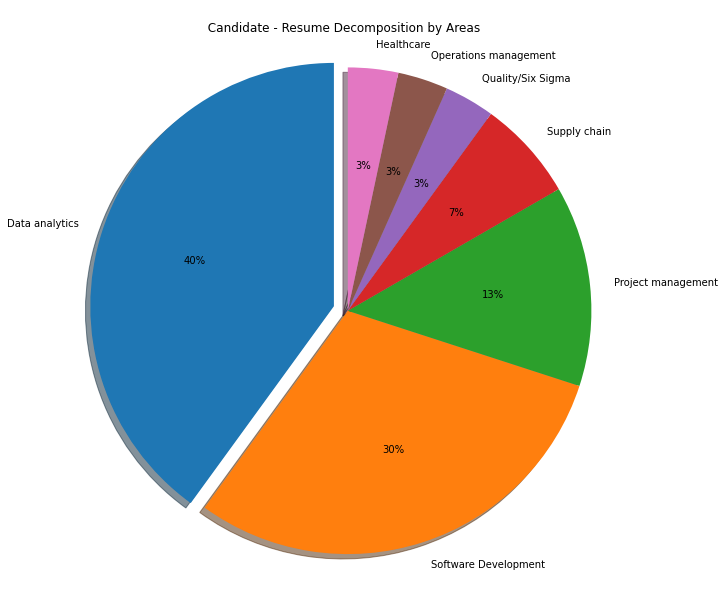

In [90]:
# Create pie chart visualization
pie = plt.figure(figsize=(10,10))
plt.pie(summary['score'], labels=summary.index, explode = (0.06,0,0,0,0,0,0), autopct='%1.0f%%',shadow=True,startangle=90)
plt.title('\n  Candidate - Resume Decomposition by Areas')
plt.axis('equal')
plt.show()

# Save pie chart as a .png file
pie.savefig('cv_screening_results.png')